In [1]:
import pandas as pd
from pandas import DataFrame
from sets import Set
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import linalg as LA
import statsmodels.formula.api as smf
%matplotlib inline

#read in
data = pd.read_csv("D3.csv", index_col=None, header=None)

C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: the sets module is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data

,0,1,2,3
0,0.4583,0.6838,0.7048,0.6163
1,0.2960,0.4277,0.4469,0.3412
2,0.7317,0.8338,0.7625,1.2294
3,0.7521,0.9045,0.9324,1.1811
4,0.2971,0.4406,0.3523,0.4627
5,0.5690,0.7744,0.7080,0.8496
6,0.5560,0.6993,0.7811,0.8134
7,0.8944,0.9993,0.8953,1.7522
8,0.9532,0.9891,1.0171,1.8413
9,0.5852,0.6853,0.7713,0.9571


In [3]:
#cross validation data
sel = 10
samp = Set()
while len(samp)<sel:   
    samp.add(random.randint(0,99))

l = list(samp)

test = data.iloc[l ,:]
tdata = data.drop(data.index[l])

In [4]:
data
#full data

,0,1,2,3
0,0.4583,0.6838,0.7048,0.6163
1,0.2960,0.4277,0.4469,0.3412
2,0.7317,0.8338,0.7625,1.2294
3,0.7521,0.9045,0.9324,1.1811
4,0.2971,0.4406,0.3523,0.4627
5,0.5690,0.7744,0.7080,0.8496
6,0.5560,0.6993,0.7811,0.8134
7,0.8944,0.9993,0.8953,1.7522
8,0.9532,0.9891,1.0171,1.8413
9,0.5852,0.6853,0.7713,0.9571


In [5]:
test
#Test Data

,0,1,2,3
99,0.9617,1.1835,1.1587,1.8941
68,0.9968,1.1830,1.1533,2.0711
38,0.2851,0.5135,0.4872,0.4692
39,0.6396,0.6811,0.6868,0.9443
11,0.7274,0.8168,0.8868,1.1470
77,0.8382,1.0503,0.9573,1.6205
46,0.6331,0.8574,0.6413,0.9542
16,0.5786,0.7974,0.6678,0.9648
81,0.3378,0.3779,0.4452,0.3914
30,0.6795,0.8793,0.6882,1.1521


In [6]:
tdata
#Training Data

,0,1,2,3
0,0.4583,0.6838,0.7048,0.6163
1,0.2960,0.4277,0.4469,0.3412
2,0.7317,0.8338,0.7625,1.2294
3,0.7521,0.9045,0.9324,1.1811
4,0.2971,0.4406,0.3523,0.4627
5,0.5690,0.7744,0.7080,0.8496
6,0.5560,0.6993,0.7811,0.8134
7,0.8944,0.9993,0.8953,1.7522
8,0.9532,0.9891,1.0171,1.8413
9,0.5852,0.6853,0.7713,0.9571


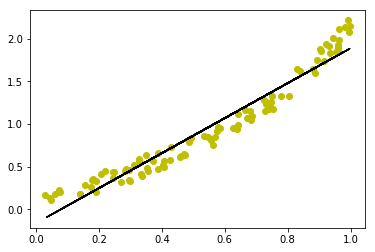

In [7]:
#linear regression scatter
fit = np.polyfit(data[0],data[3],1)
fit_fn = np.poly1d(fit) 
plt.plot(data[0],data[3], 'yo', data[0], fit_fn(data[0]), '--k')

In [9]:
#Problem 1a+1c
#polynomial regression 1-5
for i in range(1,6):
    fit = np.polyfit(data[0],data[3],i)
    fit_fn = np.poly1d(fit) 
    print "polynomial: ",i
    print fit_fn
    
    print "0.3: ", fit_fn(0.3)
    print "0.5: ", fit_fn(0.5)
    print "0.8: ", fit_fn(0.8)

NameError: name 'np' is not defined

In [10]:
#Problem 1b+1d
#polynomial regression 1-5 on Training Data and Test Data
for i in range(1,6):
    fit = np.polyfit(tdata[0],tdata[3],i)
    fit_fn = np.poly1d(fit) 
    print "polynomial: ",i
    print fit_fn
    print ""
    
    M = 0;
    for row in test.iterrows():       
        x = fit_fn(row[1][0])-row[1][3]
        M += x*x
        
    print "(M(x)-y)^2: ", M/sel
    print ""

NameError: name 'np' is not defined

In [10]:
#basic multivariable regression
lm = smf.ols(formula='data[3] ~ data[0] + data[1] + data[2]', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                data[3]   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     547.8
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           3.12e-60
Time:                        20:07:55   Log-Likelihood:                 54.682
No. Observations:                 100   AIC:                            -101.4
Df Residuals:                      96   BIC:                            -90.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1360      0.046     -2.935      0.004      -0.228      -0.044
data[0]        2.2850      0.297      7.702      0.000       1.696       2.874
data[1]       -0.2913      0.200     -1.454      0.149      -0.689       0.106
data[2]        0.0667      0.212      0.314      0.754      -0.355       0.488
==============================================================================
Omnibus:                       19.445   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.991
Skew:                           0.281   Prob(JB):                       0.0500
Kurtosis:                       1.940   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
#Least squares helper function uses current lm params
def leastSquares(x1, x2, x3):
    return  lm.params[0] + lm.params[1] * x1 + lm.params[2] * x2 + lm.params[3] * x3

In [4]:
#Problem 2a
print leastSquares(0.3,0.4,0.1)
print leastSquares(0.5,0.2,0.4)
print leastSquares(0.8,0.2,0.7)

NameError: global name 'lm' is not defined

In [13]:
#Problem 2b
lm = smf.ols(formula='tdata[3] ~ tdata[0] + tdata[1] + tdata[2]', data = tdata).fit()
M = 0.0;
print "parameters:"
print lm.params
print ""
for row in test.iterrows():
    x = leastSquares(row[1][0], row[1][1], row[1][2]) - row[1][3]
    M += x*x
print "(M(x)-y)^2: ", M/sel

parameters:
Intercept   -0.094904
tdata[0]     2.529848
tdata[1]    -0.411109
tdata[2]    -0.068430
dtype: float64

(M(x)-y)^2:  0.0241688387617


iter:  1 value:  [0 0] func:  29
iter:  2 v:  [ 2.  3.] func:  34.0
iter:  3 v:  [ 2.  3.] func:  34.0
iter:  4 v:  [ 2.  3.] func:  34.0
iter:  5 v:  [ 2.  3.] func:  34.0
iter:  6 v:  [ 2.  3.] func:  34.0
iter:  7 v:  [ 2.  3.] func:  34.0
iter:  8 v:  [ 2.  3.] func:  34.0
iter:  9 v:  [ 2.  3.] func:  34.0
iter:  10 v:  [ 2.  3.] func:  34.0
iter:  1 value:  [0 0] func:  29
iter:  2 v:  [-2. -3.] func:  50.0
iter:  3 v:  [-6. -9.] func:  170.0
iter:  4 v:  [-14. -21.] func:  722.0
iter:  5 v:  [-30. -45.] func:  3074.0
iter:  6 v:  [-62. -93.] func:  12770.0
iter:  7 v:  [-126. -189.] func:  52130.0
iter:  8 v:  [-254. -381.] func:  210722.0
iter:  9 v:  [-510. -765.] func:  847394.0
iter:  10 v:  [-1022. -1533.] func:  3398690.0


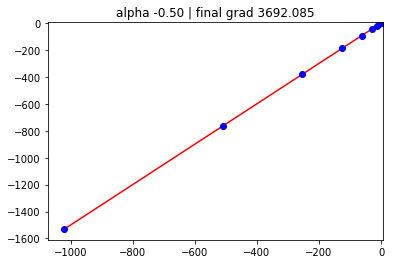

In [14]:
#Problem 3
#Function 1
def func(x,y):
    return (x-5)**2 + (y+2)**2
def func_grad(vx,vy):
    dfdx = 2.0*vx - 4.0
    dfdy = 2.0*vy - 6.0
    return np.array([dfdx,dfdy])

#prepare for contour plot
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x,y)
lev = np.linspace(0,20,21)

#iterate location
v_init = np.array([0,0])
num_iter = 10
values = np.zeros([num_iter,2])
for alpha in [.5,-.5]:
    values[0,:] = v_init
    v = v_init
    print "iter: ", 1, "value: ", v, "func: ", func(v[0],v[1])
    # actual gradient descent algorithm
    for i in range(1,num_iter):        
        v = v - alpha * func_grad(v[0],v[1])      
        values[i,:] = v
        print "iter: ", i+1, "v: ", v, "func: ", func(v[0],v[1])
    
    #plotting
    plt.contour(x,y,z,levels=lev)
    plt.plot(values[:,0],values[:,1],'r-')
    plt.plot(values[:,0],values[:,1],'bo')
    grad_norm = LA.norm(func_grad(v[0],v[1]))
    title = "alpha %0.2f | final grad %0.3f" % (alpha,grad_norm)
    plt.title(title)

0.000116387337058
iter:  1 value:  [0 0] func:  3525
iter:  2 v:  [ 0.02793296  0.16852886] func:  2643.48596102
iter:  3 v:  [ 0.0511606   0.30095749] func:  2060.60991683
iter:  4 v:  [ 0.07087042  0.40821383] func:  1653.82348808
iter:  5 v:  [ 0.08784661  0.4970472 ] func:  1358.23585821
iter:  6 v:  [ 0.10263676  0.57190074] func:  1136.59017022
iter:  7 v:  [ 0.11563969  0.63584352] func:  966.140909989
iter:  8 v:  [ 0.1271555   0.69107697] func:  832.313692687
iter:  9 v:  [ 0.13741607  0.73922893] func:  725.39672674
iter:  10 v:  [ 0.14660448  0.78153372] func:  638.705121322
iter:  11 v:  [ 0.15486793  0.81894725] func:  567.510017194
iter:  12 v:  [ 0.1623266   0.85222324] func:  508.387195633
iter:  13 v:  [ 0.16907994  0.88196532] func:  458.806532969
iter:  14 v:  [ 0.17521119  0.90866349] func:  416.865231055
iter:  15 v:  [ 0.18079069  0.93272031] func:  381.10980871
iter:  16 v:  [ 0.18587847  0.95447001] func:  350.414519043
iter:  17 v:  [ 0.19052611  0.97419273] fu

iter:  79 v:  [-1.99940553  4.00029425] func:  561.165852549
iter:  80 v:  [-1.99940602  4.000294  ] func:  561.165715972
iter:  81 v:  [-1.9994065   4.00029376] func:  561.165579508
iter:  82 v:  [-1.99940699  4.00029352] func:  561.165443156
iter:  83 v:  [-1.99940748  4.00029328] func:  561.165306916
iter:  84 v:  [-1.99940797  4.00029304] func:  561.165170789
iter:  85 v:  [-1.99940846  4.0002928 ] func:  561.165034773
iter:  86 v:  [-1.99940894  4.00029255] func:  561.16489887
iter:  87 v:  [-1.99940943  4.00029231] func:  561.164763078
iter:  88 v:  [-1.99940992  4.00029207] func:  561.164627399
iter:  89 v:  [-1.9994104   4.00029183] func:  561.16449183
iter:  90 v:  [-1.99941089  4.00029159] func:  561.164356374
iter:  91 v:  [-1.99941137  4.00029135] func:  561.164221029
iter:  92 v:  [-1.99941186  4.00029111] func:  561.164085795
iter:  93 v:  [-1.99941234  4.00029087] func:  561.163950673
iter:  94 v:  [-1.99941283  4.00029063] func:  561.163815662
iter:  95 v:  [-1.99941331

C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\MeySam\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


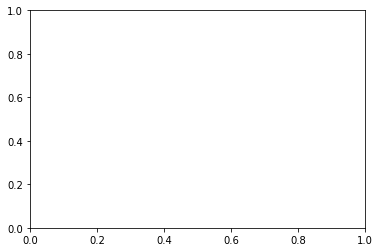

In [17]:
#Problem 3
#Function 1

def func(x,y):
    return (1-(y-4))**2 + 35*((x+6)-(y-4)**2)**2
def func_grad(vx,vy):
    dfdx = 40*vx - 40*(vy - 3)**2 + 120
    dfdy = 2*vy + 20*(-4*vy + 12)*(vx - (vy - 3)**2 + 3) - 8
    return np.array([dfdx,dfdy])

#prepare for contour plot
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x,y)
lev = np.linspace(0,20,21)



_init = np.array([0,0])
num_iter = 100
values = np.zeros([num_iter,2])
for alpha in [1.0/8592,1.0/481.69,.5]:
    print alpha
    values[0,:] = v_init
    v = v_init
    print "iter: ", 1, "value: ", v, "func: ", func(v[0],v[1])
    # actual gradient descent algorithm
    for i in range(1,num_iter):        
        v = v - alpha * func_grad(v[0],v[1])      
        values[i,:] = v
        print "iter: ", i+1, "v: ", v, "func: ", func(v[0],v[1])
    
    #plotting
    plt.contour(x,y,z,levels=lev)
    plt.plot(values[:,0],values[:,1],'r-')
    plt.plot(values[:,0],values[:,1],'bo')
    grad_norm = LA.norm(func_grad(v[0],v[1]))
    title = "alpha %0.2f | final grad %0.3f" % (alpha,grad_norm)
    plt.title(title)
    file = "gd-%2.0f.pdf" % (alpha*100)
    plt.savefig(file, bbox_inches='tight')
    plt.clf()
    plt.cla()